<font color='orange' size=8><B>Lab Report : Basic ROS for FRA333</B></font>

<font size=5><B>Objective:</B></font>
- เพื่อศึกษาการทำงานของระบบ ROS2 ในหัวข้อ Node, Publisher, Subscriber, Service, Parameter และ Launch File
- เพื่อให้นักศึกษาสามารถประยุกต์การองค์ความรู้จากวัตถุประสงค์ข้อที่ 1 กับโจทย์พื้นฐาน

------------------------------------------------------------------------------------------------------------------------------
<font size=5><B>หัวข้อที่เกี่ยวกับ ROS2 และแหล่งข้อมูลสำหรับการศึกษาเพิ่มเติม</B></font>

- Publisher/Subscriber      https://docs.ros.org/en/foxy/Tutorials/Beginner-Client-Libraries/Writing-A-Simple-Py-Publisher-And-Subscriber.html
- Service/Client            https://docs.ros.org/en/foxy/Tutorials/Beginner-Client-Libraries/Writing-A-Simple-Py-Service-And-Client.html
- Custom interface          https://docs.ros.org/en/foxy/Tutorials/Beginner-Client-Libraries/Single-Package-Define-And-Use-Interface.html
- Parameter  in a class     https://docs.ros.org/en/foxy/Tutorials/Beginner-Client-Libraries/Using-Parameters-In-A-Class-Python.html
- Launch file               https://docs.ros.org/en/foxy/Tutorials/Intermediate/Launch/Launch-Main.html
- Random Noise              https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
- How to pass arguments to python node  https://answers.ros.org/question/64552/how-to-pass-arguments-to-python-node/

------------------------------------------------------------------------------------------------------------------------------

ให้นักศึกษาออกแบบระบบโดยใช้ ROS2 สำหรับสร้างระบบ Random Walk ที่มีสัญญาณรบกวนที่เป็นรูปแบบ Random Noise ที่มีการกระจายตัวแบบ Gaussian Distribution (การกระจายตัวนี้จะประกอบไปด้วยค่า mean และ variance) ที่ประกอบไปด้วยโหนดต่างๆดังต่อไปนี้
- <font color='red'>Node: /linear/noise_generator</font> ใช้สำหรับการสร้างสัญญาณรบกวนในเทอมของความเร็วเชิงเส้น
- <font color='red'>Node: /angular/noise_generator</font> ใช้สำหรับการสร้างสัญญาณรบกวนในเทอมของความเร็วเชิงมุม
- <font color='red'>Node: /velocity_multiplexer</font> ใช้สำหรับสร้างสัญญาณความเร็ว Twist เพื่อสั่งงานหุ่นยนต์เต่า
- <font color='red'>Node: /turtlesim</font> ใช้สำหรับรับค่าสัญญาณความเร็ว Twist จากนั้นเคลื่อนที่ตามคำสั่งที่กำหนด 
- Hint!!! เนื่องจาก /linear/noise_generator กับ /angular/noise_generator มีคุณสมบัติและการทำงานเหมือนกันคือการสร้างสัญญาณรบกวนให้แก่ระบบ ดังนั้นนศ.สามารถสร้างแค่ node เดียวได้โดยใช้เทคนิคการปรับค่าใน launch file เพื่อเปลี่ยนค่าพารามิเตอร์บางตัวเท่านั้น

ระบบดังกล่าวมีภาพรวมของระบบดังรูปที่ 1 (ถ้ารูปไม่ขึ้นใน jupiter notebook ให้ไปดูที่ไฟล์ pic1.png) สามารถอธิบายคุณสมบัติของแต่ละ Node ได้ดังนี้


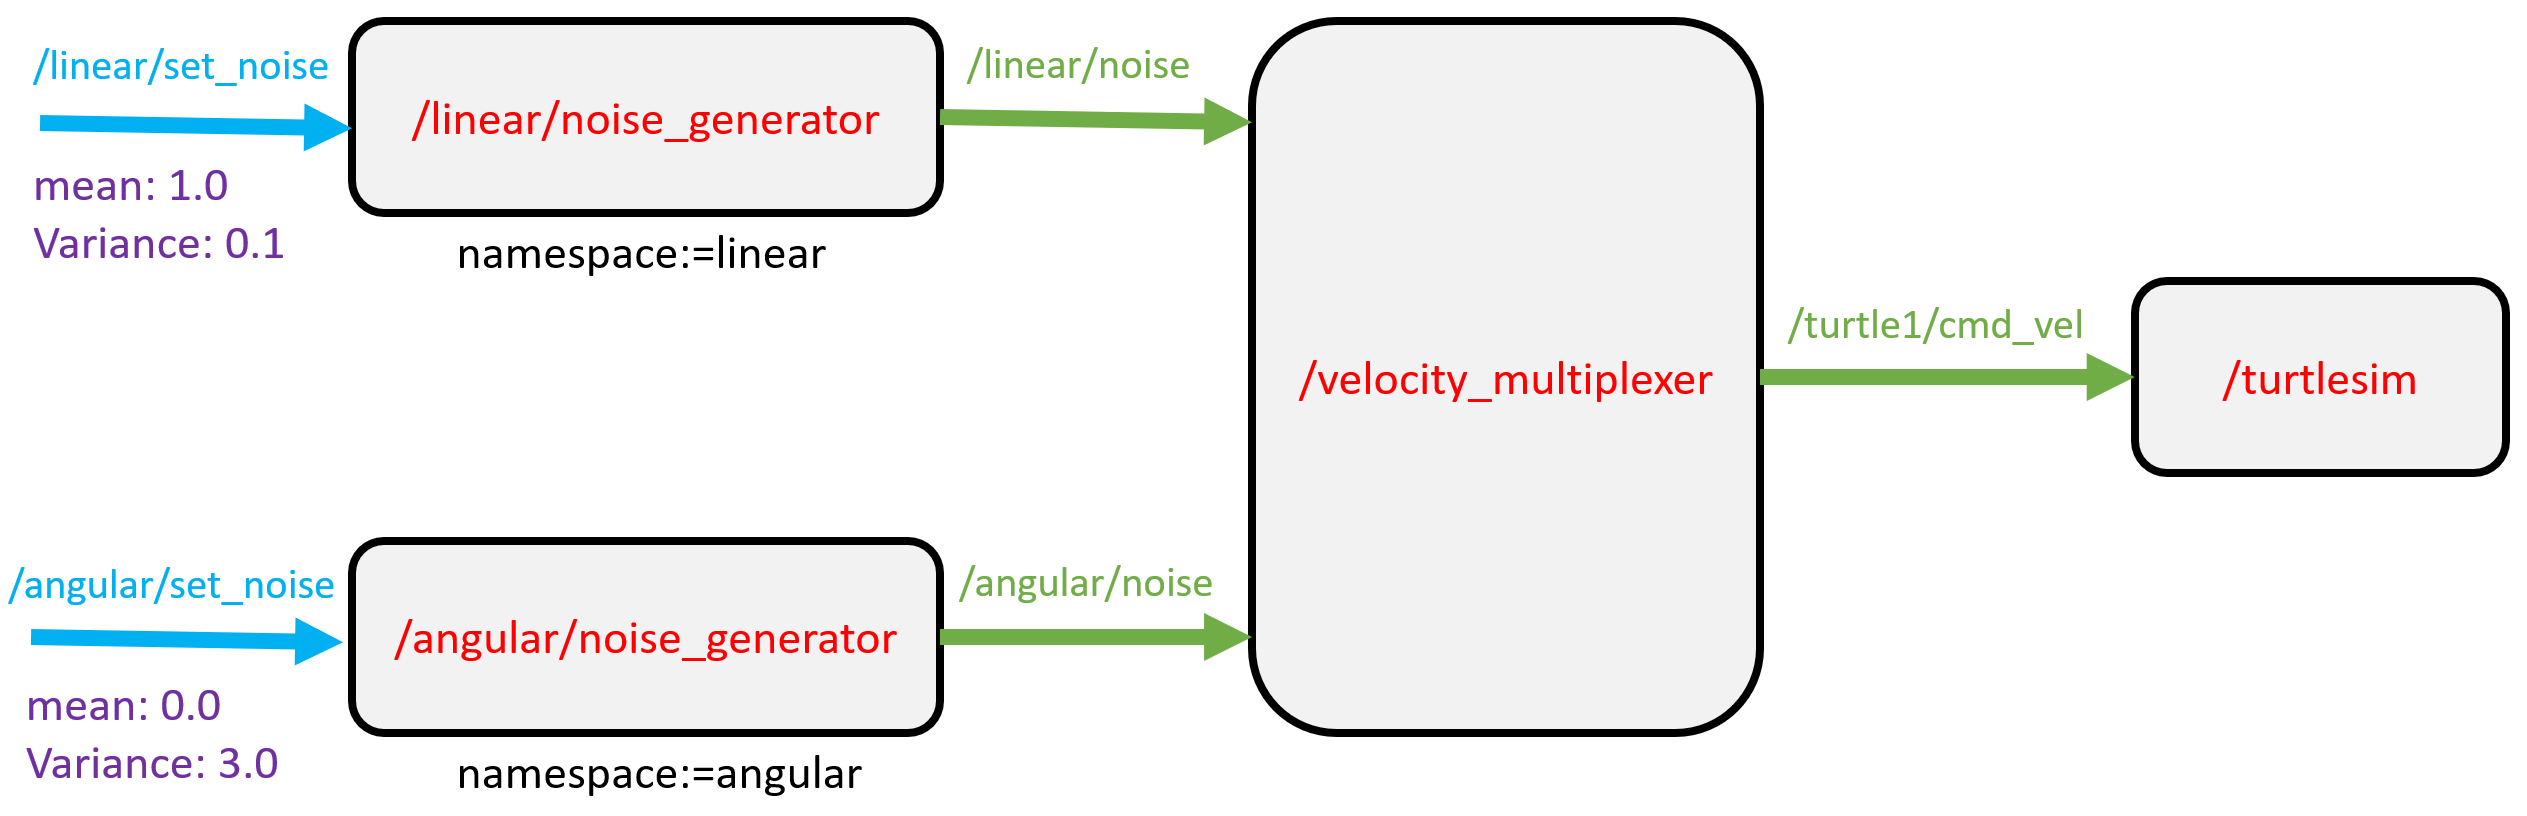

In [4]:
import os
cwd = os.getcwd()
cwd
from IPython import display
display.Image("./pic1.png")



<center>รูปที่ 1 แสดงภาพรวมของระบบ Random Walk</center>

- <font color='red'>Node: /linear/noise_generator</font> คือ โหนดที่สามารถสร้างสัญญาณรบกวนของความเร็วเชิงเส้นจำนวน 1 ช่องสัญญาณประกอบด้วย 
    - <font color='green'>Topic (Publisher): /noise Type: std_msgs/Float64</font> 
    - <font color='pink'>Argument System: /rate</font> ความถี่ในการส่งสัญญาณ นักศึกษาสามารถตั้งค่าความถี่ได้จาก launch file (The default rate is 5.0 Hz)
    - <font color='blue'>Service (Server): /set_noise</font> สำหรับการปรับค่าคุณสมบัติของสัญญาณรบกวน โดยที่การเรียกใช้งาน service ผ่าน custom service ในรูปแบบดังนี้ (ไฟล์ SetNoise.srv ใน lab1_interfaces/srv)
        - <font color='purple'>request: /mean (std_msgs/Float64)</font> (The default mean is 0.0)
        - <font color='purple'>request: /variance (std_msgs/Float64)</font> (The default mean is 1.0)

- <font color='red'>Node: /angular/noise_generator</font> คือ โหนดที่สามารถสร้างสัญญาณรบกวนของความเร็วเชิงมุมจำนวน 1 ช่องสัญญาณประกอบด้วย 
    - <font color='green'>Topic (Publisher): /noise Type: std_msgs/Float64</font> 
    - <font color='pink'>Argument System: /rate</font> ความถี่ในการส่งสัญญาณ นักศึกษาสามารถตั้งค่าความถี่ได้จาก launch file (The default rate is 5.0 Hz)
    - <font color='blue'>Service (Server): /set_noise</font> สำหรับการปรับค่าคุณสมบัติของสัญญาณรบกวน โดยที่การเรียกใช้งาน service ผ่าน custom service ในรูปแบบดังนี้ (ไฟล์ SetNoise.srv ใน lab1_interfaces/srv)
        - <font color='purple'>request: /mean (std_msgs/Float64)</font> (The default mean is 0.0)
        - <font color='purple'>request: /variance (std_msgs/Float64)</font> (The default mean is 1.0)

- <font color='red'>Node: /velocity_multiplexer</font> คือ โหนดที่สามารถรวมสัญญาณรบกวนจากโหนด <font color='red'>Node: /linear/noise_generator และ /angular/noise_generator</font> จากนั้นนำมาสร้างคำสั่งในการเคลื่อนที่ของเต่า
    - <font color='green'>Topic (Publisher): /cmd_vel Type: geometry_msgs/Twist</font> 
    - <font color='green'>Topic (Subscriber): /linear/noise Type: std_msgs/Float64</font> 
    - <font color='green'>Topic (Subscriber): /angular/noise Type: std_msgs/Float64</font> 
    - <font color='pink'>Argument System: /rate</font> ความถี่ในการส่งสัญญาณ นักศึกษาสามารถตั้งค่าความถี่ได้จาก launch file (The default rate is 5.0 Hz)

------------------------------------------------------------------------------------------------------------------------------
<font size=5><B>วิธีการส่งงาน</B></font>

ให้นักศึกษาเขียนโปรแกรมลงใน Package ที่อาจารย์ได้สร้าง Template ไว้ให้โดยนักศึกษาจะต้องเปลี่ยนชื่อ Package ในอยู่ในรูปแบบต่อไปนี้ "fra333_[hw/lab][1-4]_[Group]"

ตัวอย่างเช่น การบ้านที่ 2 กลุ่มที่ 12 ให้ตั้งชื่อ package ดังนี้ "fra333_hw2_12"
ตัวอย่างเช่น แลปที่ 3 กลุ่มที่ 2 ให้ตั้งชื่อ package ดังนี้ "fra333_lab3_2"

/fra333_[hw/lab][1-4]_[Group]

        /fra333_[hw/lab][1-4]_[Group]
            /__init__.py
        /launch
            /random_walk.launch.py
        /scripts
            /[node]
        /CMakeList.txt
        /package.xml
/doc

/lab1_interfaces

        /src
            /SetNoise.src
        /CmakeLists.txt
        /package.xml



<font size=5><B>Trick ! การสร้าง Package อัตโนมัติ</B></font>

นักศึกษาสามารถใช้งาน script สำหรับสร้าง package แบบอัตโนมัติได้โดยที่นักศึกษาสามารถ Download จาก https://github.com/tchoopojcharoen/ROS2_pkg_cpp_py

วิธีใช้งาน
1. ให้โหลดไฟล์ไว้ที่ไหนก็ได้ ที่ไม่ใช่ใน workspace
2. จากนั้นย้ายตำแหน่งของ cursor ใน command line ไปที่ folder ROS2_pkg_cpp_py
3. จากนั้นพิมพ์คำสั่ง . /install_pkg.bash [ตำแหน่งของ workspace] [ชื่อ package]

    ตัวอย่างเช่น
    
    . /install_pkg.bash ROS2_Directory/fra333_ws fra333_lab1_3
4. จากนั้น package จะถูกสร้างใน workpace ที่นักศึกษากำหนด